<a href="https://colab.research.google.com/github/kaitouz/OpenEdu/blob/main/Image%20Processing/Image_processing_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

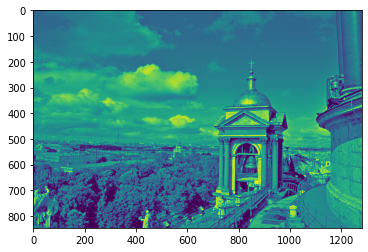

In [2]:
img = cv2.imread('1.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image);

In [3]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

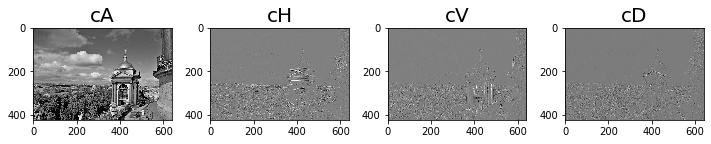

In [4]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(10, 10))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()


In [5]:
histogram, bin_edges = np.histogram(cH, bins=256)
histogram.max()

44949

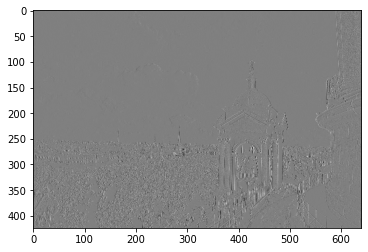

In [6]:
plt.imshow(cV, cmap = 'gray')

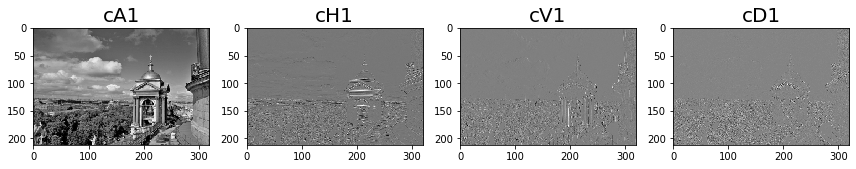

In [7]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [14]:
np.sum(np.array([cA1 < 40]))

1746

In [31]:
cA1

array([[320.5 , 319.75, 320.5 , ..., 274.75, 307.75, 236.25],
       [325.  , 322.25, 322.5 , ..., 321.25, 288.  , 239.25],
       [323.  , 329.  , 324.75, ..., 305.5 , 239.5 , 250.25],
       ...,
       [543.  , 509.75, 294.25, ..., 566.  , 500.25, 588.  ],
       [572.5 , 581.  , 662.5 , ..., 533.5 , 468.75, 528.5 ],
       [653.25, 354.25, 207.  , ..., 435.5 , 393.75, 579.25]])

In [24]:
cA1.sum()

30527703.25

In [34]:
cA11 = cA1.copy()
cnt = 0
for idx, a in enumerate(cA11):
    for idy, k in enumerate(a):
        if cA11[idx][idy] < 40:
            cA11[idx][idy] = 0
            cnt += 1
cA11.sum()
print(cnt)

1746


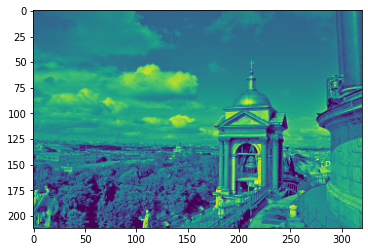

In [35]:
plt.imshow(cA11)

In [8]:
threshold = 40
h1 = cA1.shape[0] # у нас все наборы имеют вид квадратной матрицы
for i in range(h1):
      c[0][i][np.abs(c[0][i])<threshold] = 0.0 # для cA
      for j in range(len(c[1])):
         c[1][j][i][np.abs(c[1][j][i])<threshold] = 0.0  # для cH,cV,cD
print('Количество нулей =',(sum(sum(sum(c[1][m][n] == 0) for n in range(h1)) for m in range(len(c[1])))) + sum(sum(c[0][m] == 0) for m in range(h1)))


Количество нулей = 401019


In [25]:
k = [3,4,1,4]
for x in k:
    if x ==4:
        x = 0
k

[3, 4, 1, 4]

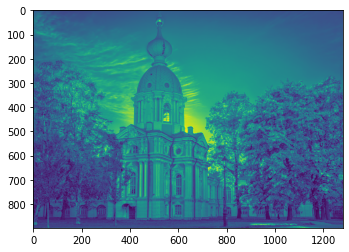

In [37]:
img2 = cv2.imread('2.jpg')
image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(image2);

In [40]:
wavelet = 'haar'
c = pywt.dwt2(image2,wavelet)
cA, (cH, cV, cD)= c


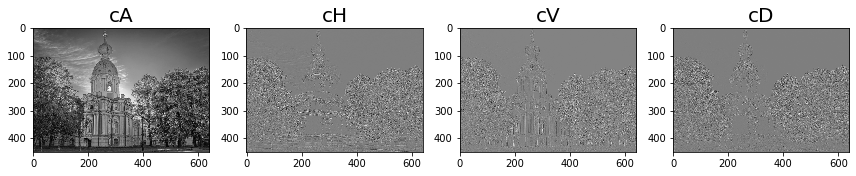

In [41]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()


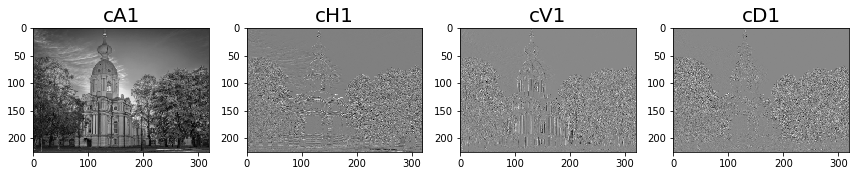

In [42]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [43]:
cA11 = cA1.copy()
cnt = 0
for idx, a in enumerate(cA11):
    for idy, k in enumerate(a):
        if cA11[idx][idy] < 40:
            cA11[idx][idy] = 0
            cnt += 1
cA11.sum()
print(cnt)

143


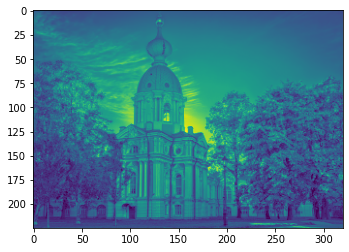

In [48]:
plt.imshow(cA11);

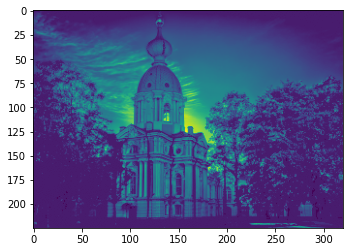

In [64]:
img322 = cv2.imread('c1_719_monastery-3714287_1280.jpg')
image332 = cv2.cvtColor(img322, cv2.COLOR_BGR2GRAY)
plt.imshow(image332);
plt.imshow(cA11 - image332);

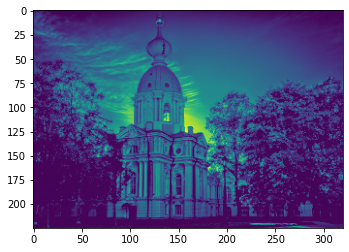

In [47]:
print('Количество нулей в наборе cA =',sum(sum(cA11[m] == 0) for m in range(len(cA11))))


Количество нулей в наборе cA = 143
